In [3]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(cowplot))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(Ipaper))

In [4]:
obj.atac <- readRDS("../data/VisiumHeart/snATAC.Rds")
obj.atac

An object of class Seurat 
521942 features across 49054 samples within 1 assay 
Active assay: peaks (521942 features, 0 variable features)
 4 dimensional reductions calculated: scopen, umap, harmony, umap_harmony

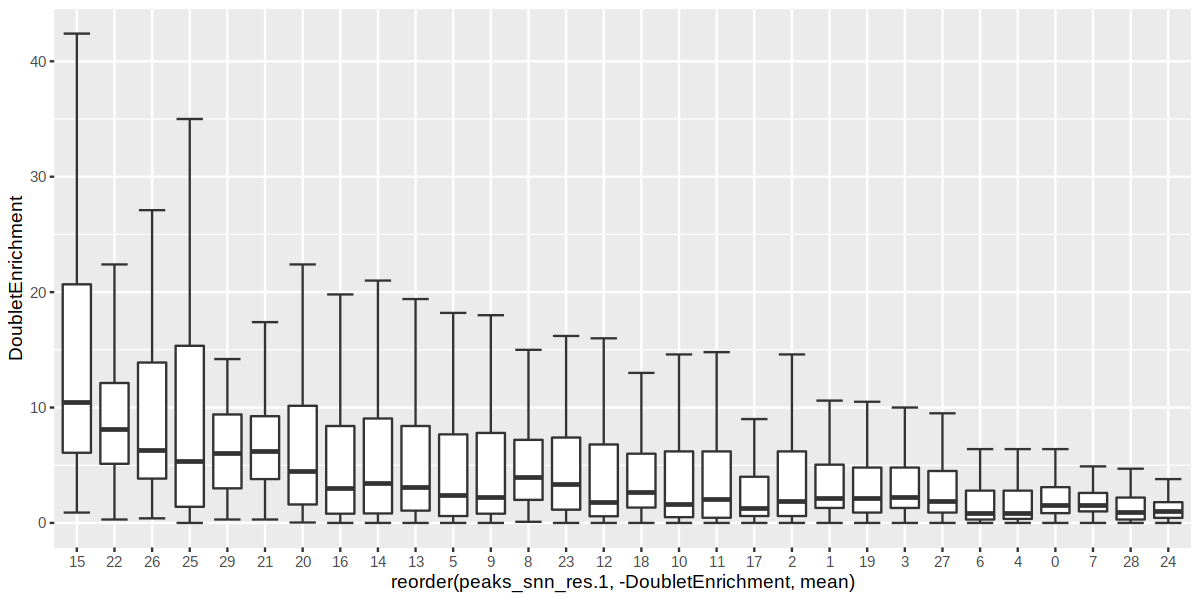

In [5]:
## check qc per cluster
df <- as.data.frame(obj.atac@meta.data) %>%
    drop_na()

p1 <- ggplot(data = df, aes(x = reorder(peaks_snn_res.1, -DoubletEnrichment, mean), 
                            y = DoubletEnrichment)) +
    geom_boxplot2()

options(repr.plot.width = 10, repr.plot.height = 5)

p1

In [6]:
Idents(obj.atac) <- "peaks_snn_res.1"

obj.atac.sub <- subset(obj.atac, idents = c(14, 22, 21, 26, 25), invert = TRUE)

obj.atac.sub

An object of class Seurat 
521942 features across 46383 samples within 1 assay 
Active assay: peaks (521942 features, 0 variable features)
 4 dimensional reductions calculated: scopen, umap, harmony, umap_harmony

In [7]:
obj.atac.sub <- RunUMAP(obj.atac.sub, 
               dims = 1:30, 
               reduction = 'harmony',
               reduction.name = "umap_harmony_v2",
               reduction.ke = 'umapharmonyv2_',
              verbose = FALSE,
                min.dist = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


Length of unique values greater than palette, interpolating..



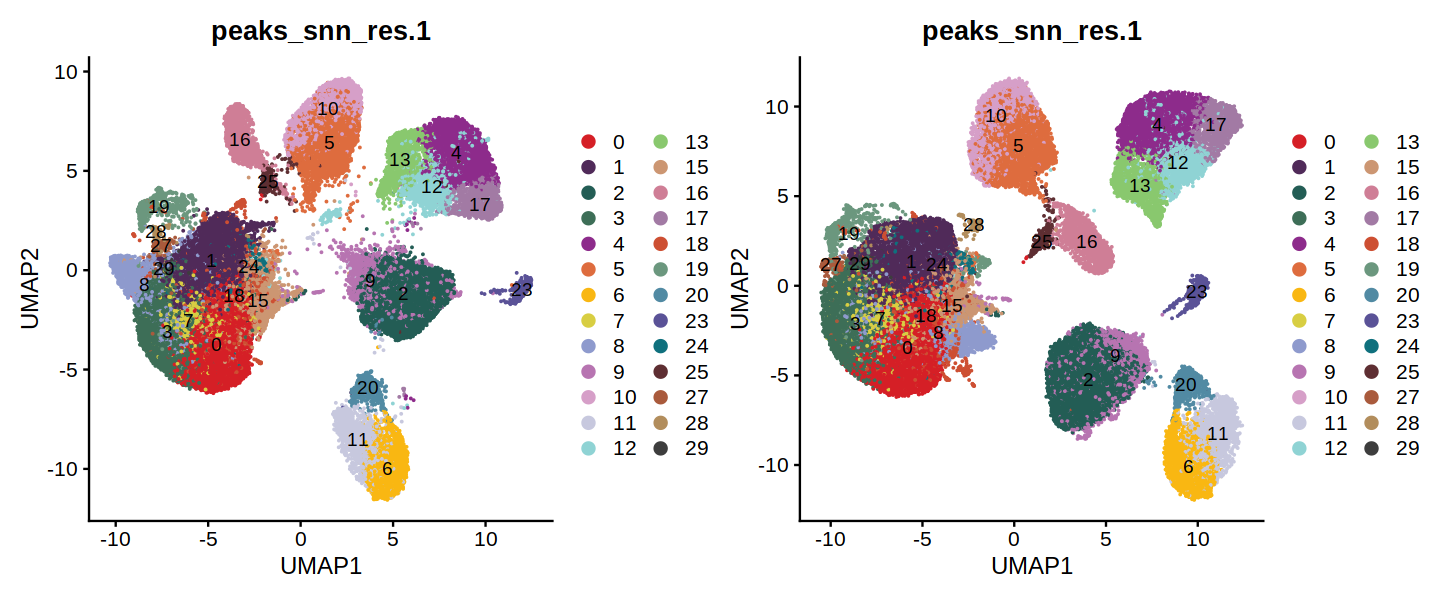

In [8]:
options(repr.plot.height = 15, repr.plot.width = 18)
cols <- ArchR::paletteDiscrete(obj.atac.sub@meta.data[, "peaks_snn_res.1"])

p1 <- DimPlot(obj.atac.sub, group.by = "peaks_snn_res.1", label = TRUE,
             reduction = "umap_harmony", shuffle = TRUE) +
    scale_color_manual(values = cols) +
    xlab("UMAP1") + ylab("UMAP2")

p2 <- DimPlot(obj.atac.sub, group.by = "peaks_snn_res.1", label = TRUE,
             reduction = "umap_harmony_v2", shuffle = TRUE) +
    scale_color_manual(values = cols) +
    xlab("UMAP1") + ylab("UMAP2")

options(repr.plot.height = 5, repr.plot.width = 12)

p1 + p2

In [9]:
levels(obj.atac.sub)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "15"
[16] "16" "17" "18" "19" "20" "23" "24" "25" "27" "28" "29"

In [13]:
Idents(obj.atac.sub) <- "peaks_snn_res.1"
new.cluster.ids <- c("0" = "CM", # 0 
                     "1" = "CM", # 1
                     "2" = "Fib", #
                     "3" = "CM", 
                     "4" = "Endo", 
                     "5" = "Myeloid",
                    "6" = "Pericyte",
                    "7" = "CM",
                    "8" = "CM",
                    "9" = "Fib",
                    "10" = "Myeloid",
                    "11" = "Pericyte",
                    "12" = "Endo",
                    "13" = "Endo",
                    "15" = "CM",
                    "16" = "Lymphoid",
                    "17" = "Endo",
                    "18" = "CM",
                    "19" = "CM",
                    "20" = "vSMCs",
                    "23" = "Neuronal",
                    "24" = "CM",
                    "27" = "CM",
                    "28" = "CM",
                    "29" = "CM")
obj.atac.sub <- RenameIdents(obj.atac.sub, new.cluster.ids)

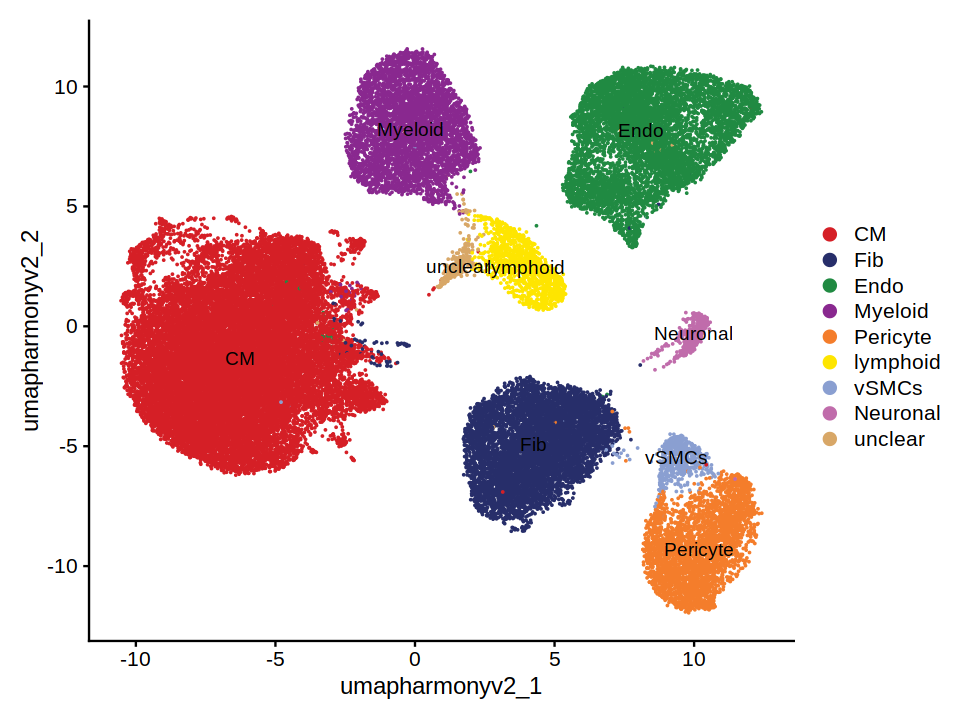

In [14]:
options(repr.plot.height = 6, repr.plot.width = 8)

obj.atac.sub$cell_type <- Idents(obj.atac.sub)

cols <- ArchR::paletteDiscrete(obj.atac.sub$cell_type)

DimPlot(obj.atac.sub, reduction = "umap_harmony_v2", 
        label = TRUE, pt.size = 0.01) +
    scale_color_manual(values = cols)

In [ ]:
## Save data
saveRDS(obj.atac.sub, "../data/VisiumHeart/snATAC.annotated.Rds")

In [ ]:
## Session information

sessionInfo()